In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

In [3]:
data = pd.read_csv('twic_master.csv')
data.head()

C:\Users\Kushagra\AppData\Local\Temp\ipykernel_16868\1514194583.py:1: DtypeWarning: Columns (10,13,14,23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('twic_master.csv')


,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,...,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory
0,1260,"Tukhaev,A","Carlsen,M",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. ...,St Petersburg RUS,False,...,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1260,"Nakamura,Hi","Teske,H",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. Nf3 Nf6 2. g3 d5 3. Bg2 g6 4. c4 dxc4 5. Na...,St Petersburg RUS,False,...,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1260,"Tari,A","Artemiev,V",2018-12-26,2018.12.26,World Rapid 2018,0-1,1. e4 c5 2. Nf3 d6 3. Bb5+ Bd7 4. c4 Nc6 5. d4...,St Petersburg RUS,False,...,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1260,"Fedoseev,Vl3","Tregubov,P",2018-12-26,2018.12.26,World Rapid 2018,1/2-1/2,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nd3 Nxe4 5. ...,St Petersburg RUS,False,...,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1260,"Hovhannisyan,R","Aronian,L",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 g6 2. d4 Bg7 3. Nc3 c6 4. Nf3 d6 5. h3 N...,St Petersburg RUS,False,...,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
columns_to_drop = ['EventDate', 'Variation', 'WhiteFideId', 'BlackFideId','BlackTeam', 'WhiteTeam', 'EventType', 'FEN', 'SetUp', 'Variant', 'Board', 'PlyCount', 'EventCategory', 'twic_number', 'WhiteTitle', 'BlackTitle']
data = data.drop(columns=columns_to_drop, inplace = False, errors='ignore')
data['Year'] = data['Date'].str.split('-').str[0]

In [5]:
data = data.drop(columns='Date', inplace = False, errors='ignore')
data.head()

,White,Black,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteElo,BlackElo,Year
0,"Tukhaev,A","Carlsen,M",World Rapid 2018,1-0,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. ...,St Petersburg RUS,False,1.1,B33,Sicilian,2527.0,2835.0,2018
1,"Nakamura,Hi","Teske,H",World Rapid 2018,1-0,1. Nf3 Nf6 2. g3 d5 3. Bg2 g6 4. c4 dxc4 5. Na...,St Petersburg RUS,False,1.2,A05,Reti opening,2746.0,2483.0,2018
2,"Tari,A","Artemiev,V",World Rapid 2018,0-1,1. e4 c5 2. Nf3 d6 3. Bb5+ Bd7 4. c4 Nc6 5. d4...,St Petersburg RUS,False,1.3,B52,Sicilian,2620.0,2709.0,2018
3,"Fedoseev,Vl3","Tregubov,P",World Rapid 2018,1/2-1/2,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nd3 Nxe4 5. ...,St Petersburg RUS,False,1.4,C42,Petrov's defence,2719.0,2592.0,2018
4,"Hovhannisyan,R","Aronian,L",World Rapid 2018,1-0,1. e4 g6 2. d4 Bg7 3. Nc3 c6 4. Nf3 d6 5. h3 N...,St Petersburg RUS,False,1.5,B06,Robatsch defence,2637.0,2765.0,2018


In [6]:
data['White'] = data['White'].replace({'A-Ali,Sali Abbas Abdulzahra': 'A-ALI,Sali Abbas Abdulzahra'})
data['Black'] = data['Black'].replace({'A-Ali,Sali Abbas Abdulzahra': 'A-ALI,Sali Abbas Abdulzahra'})

In [7]:
data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1971314    False
1971315    False
1971316    False
1971317    False
1971318    False
Length: 1971319, dtype: bool

In [8]:
data.describe()

,WhiteElo,BlackElo
count,1.901715e+06,1.900345e+06
mean,2.234998e+03,2.231981e+03
std,3.018809e+02,3.362326e+02
min,1.001000e+03,1.001000e+03
25%,2.071000e+03,2.067000e+03
50%,2.280000e+03,2.277000e+03
75%,2.445000e+03,2.442000e+03
max,3.958000e+03,2.042690e+05


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


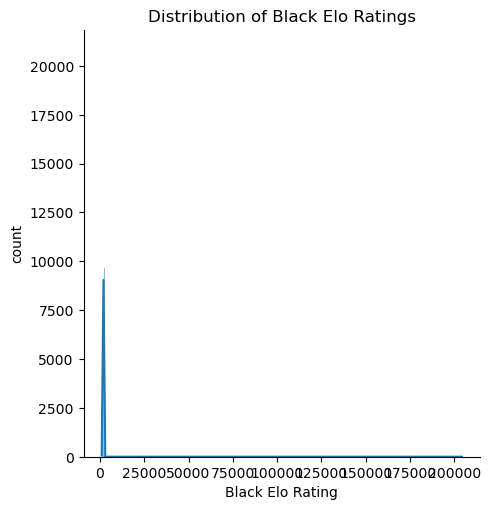

In [9]:
sns.displot(data=data, x='BlackElo', kde=True)
plt.title('Distribution of Black Elo Ratings')
plt.xlabel('Black Elo Rating')
plt.ylabel('count')

plt.show()

Black elo Rating **Distribution plot** is completely left skewed ---- it has outliers

In [10]:
data['BlackElo'].max()

204269.0

<Axes: ylabel='BlackElo'>

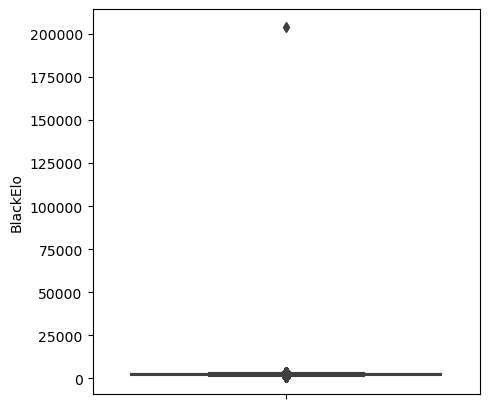

In [11]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=data, y='BlackElo')

In [12]:
data = data.drop(data[data['BlackElo'] == 204269.0].index)

After removing outliers

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-12.805555555555555, 0.5, 'Frequency')

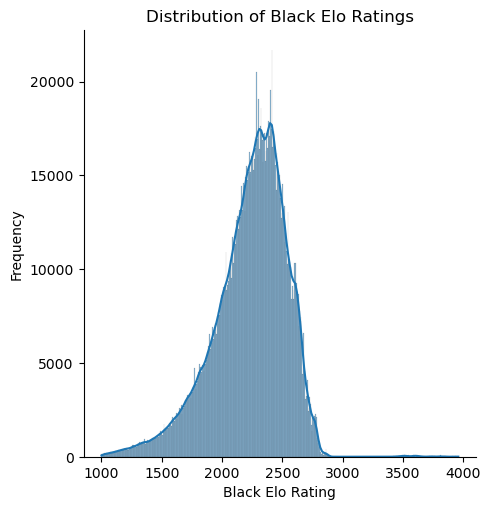

In [13]:
sns.displot(data=data, x='BlackElo', kde=True)
plt.title('Distribution of Black Elo Ratings')
plt.xlabel('Black Elo Rating')
plt.ylabel('Frequency')

In [14]:
data.dtypes
convert_dict = {'Year': int}
data = data.astype(convert_dict)

data = data.drop(data[data['Year'] == 2005].index)
data = data.drop(data[data['Year'] == 1988].index)
data = data.drop(data[data['Year'] == 2010].index)
data = data.drop(data[data['Year'] == 2011].index)
data = data.drop(data[data['Year'] == 2029].index)
data = data.drop(data[data['Result'] == '*'].index)
data = data.drop(data[data['Result'] == '-'].index)
data = data.drop(data[data['Result'] == '1/2 1/2'].index)
data = data.drop(data[data['Result'] == '1-0 ff'].index)


<Axes: ylabel='Year'>

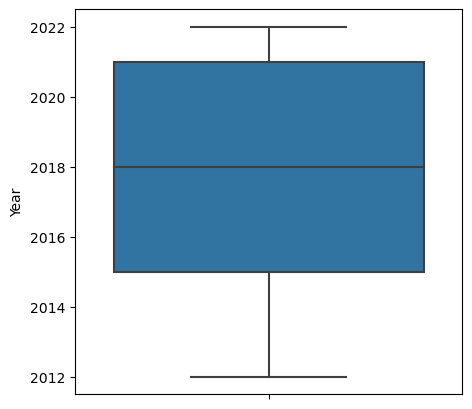

In [15]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=data, y='Year')


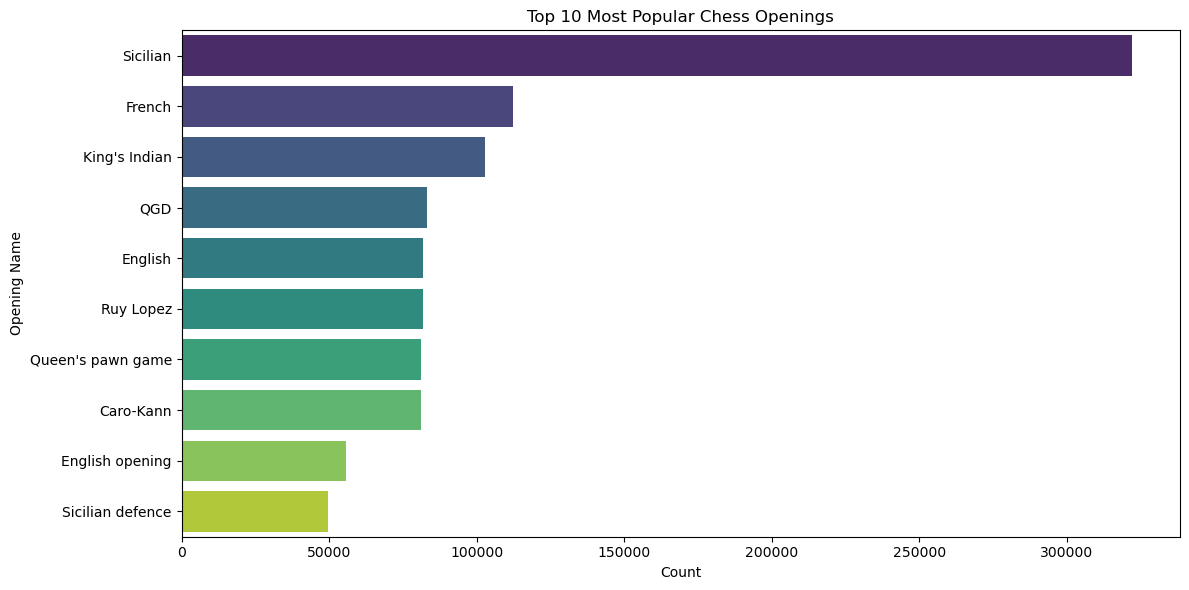

In [16]:
opening_data = data['Opening']
opening_popularity = opening_data.value_counts()
N = 10
top_openings = opening_popularity.head(N)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_openings.values, y=top_openings.index, palette="viridis")
plt.title(f'Top {N} Most Popular Chess Openings')
plt.xlabel('Count')
plt.ylabel('Opening Name')

plt.tight_layout()
plt.show()

In [17]:
data_group = data.groupby(['Year', 'Opening']).size().reset_index(name='count')
data_group_max = data_group.groupby(['Year'])['count'].transform(max) == data_group['count']
year_max_opening = data_group[data_group_max].reset_index(drop=True)
year_max_opening = year_max_opening.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
print(year_max_opening)

    Year   Opening  count
0   2012  Sicilian  16389
1   2013  Sicilian  23481
2   2014  Sicilian  22918
3   2015  Sicilian  22645
4   2016  Sicilian  24635
5   2017  Sicilian  27313
6   2018  Sicilian  28837
7   2019  Sicilian  30349
8   2020  Sicilian  37547
9   2021  Sicilian  50531
10  2022  Sicilian  37578


In [18]:
Openings = year_max_opening['Opening'].values


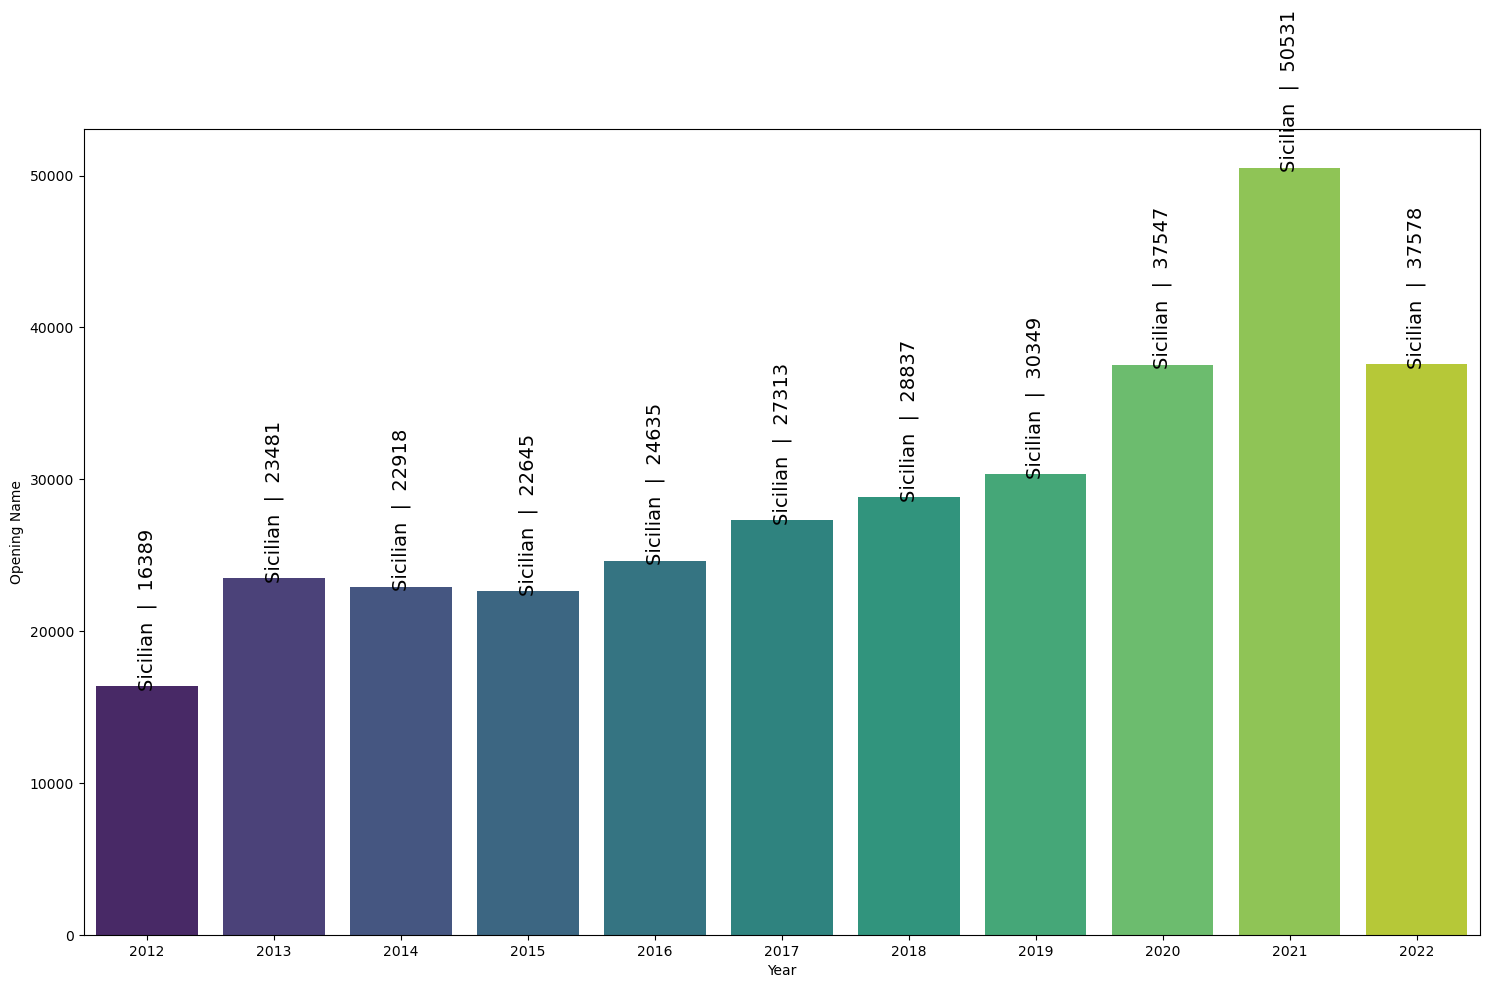

In [19]:

plt.figure(figsize=(15, 10))
g = sns.barplot(x='Year', y='count', data=year_max_opening, palette="viridis", )
index = 0

plt.xlabel('Year')
plt.ylabel('Opening Name')
for value in year_max_opening['count'].values:
    g.text(index, value + 5, str(Openings[index] + '  |  ' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.tight_layout()
plt.show()

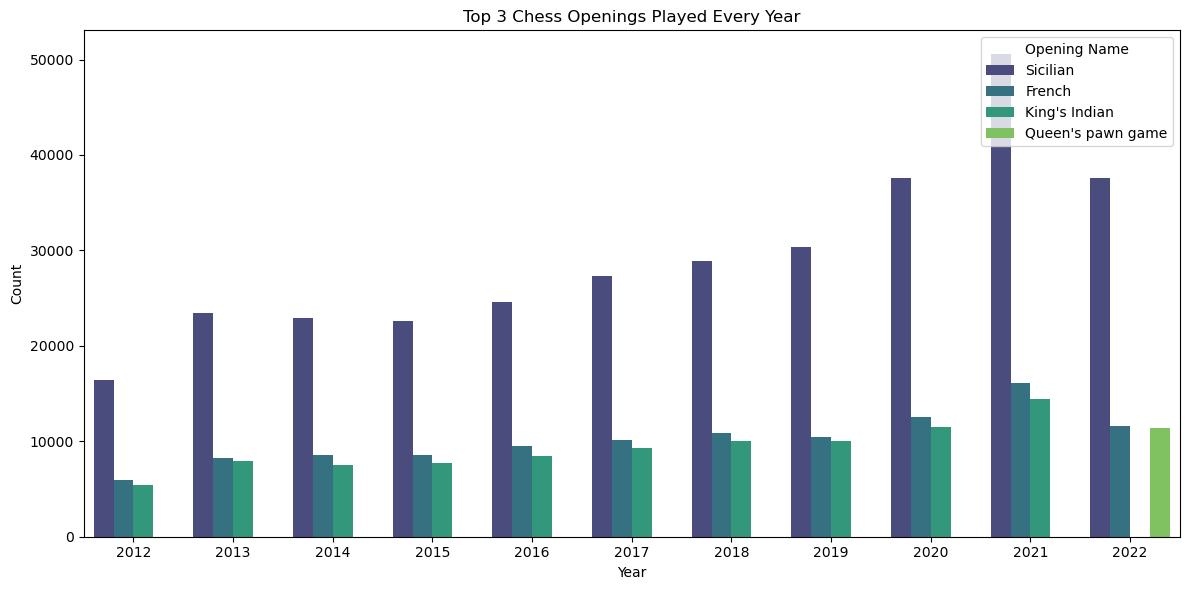

In [20]:
top_openings = data_group.groupby('Year').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)


plt.figure(figsize=(12, 6))
sns.barplot(data=top_openings, x='Year', y='count', hue='Opening', palette='viridis')
plt.title('Top 3 Chess Openings Played Every Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Opening Name', loc='upper right')


plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Its clear that Scicilian is the most popular opening for chess

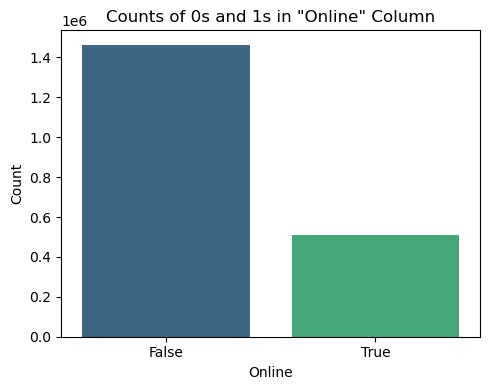

In [21]:
online_counts = data['Online'].value_counts()
plt.figure(figsize=(5, 4))
sns.barplot(x=online_counts.index, y=online_counts.values, palette="viridis")
plt.title('Counts of 0s and 1s in "Online" Column')
plt.xlabel('Online')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [22]:
online_group = data.groupby(['Year', 'Online']).size().reset_index(name='count')
online_group['Online'].replace([True,False],['Online','Offline'],inplace=True)

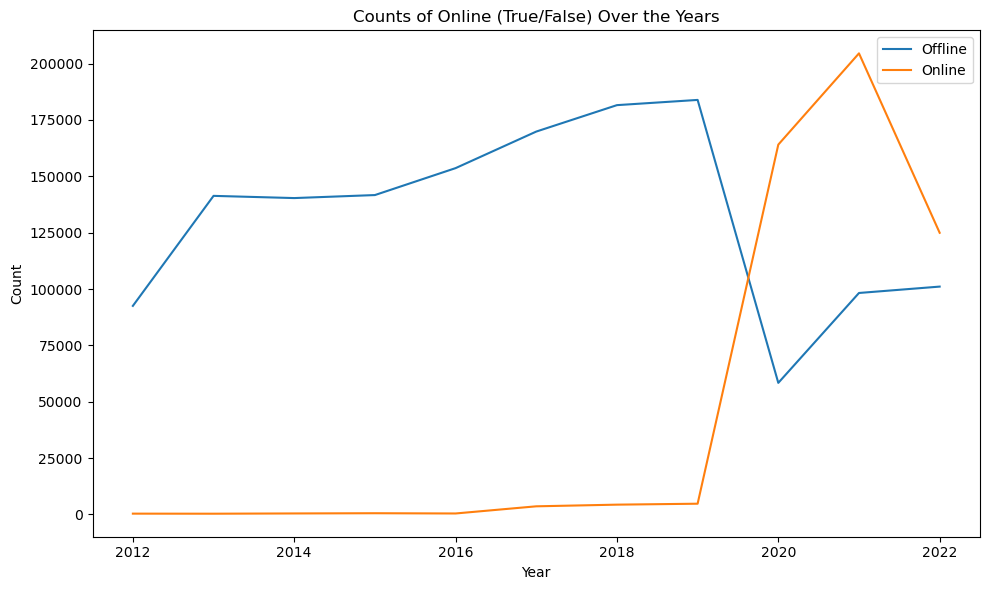

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(data= online_group, x='Year', y='count', hue = 'Online')

plt.title('Counts of Online (True/False) Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

COVID :(

**BEST OPENING FOR BLACK IF SAMPLED OVER MINIMUM OF 100 GAMES**







---- CALCULATED THE WIN RATE


---- FILTERED THE DATASET FOR OPENINGS THAT WERE PLAYED AT LEAST 100 TIMES

In [24]:
data['BlackWin'] = (data['Result'] == '0-1').astype(int)


opening_stats = data.groupby('Opening').agg({
    'Result': 'count',
    'BlackWin': 'sum'
}).reset_index()

opening_stats.columns = ['Opening', 'TotalGames', 'TotalBlackWins']
opening_stats['WinRate'] = opening_stats['TotalBlackWins'] / opening_stats['TotalGames']
sorted_opening_stats = opening_stats.sort_values(by='WinRate', ascending=False)

In [25]:
filtered_opening_stats = sorted_opening_stats[sorted_opening_stats['TotalGames'] >= 100]
sorted_opening_stats.loc[:, 'WinRate'] = sorted_opening_stats['TotalBlackWins'] / sorted_opening_stats['TotalGames']
filtered_opening_stats.head()

,Opening,TotalGames,TotalBlackWins,WinRate
129,Gruenfeld with e3 Bd3,182,112,0.615385
37,Canard opening,165,99,0.600000
185,Neo-Indian (Seirawan) attack,182,106,0.582418
24,Blackmar-Diemer gambit,394,203,0.515228
36,Budapest defence declined,388,199,0.512887


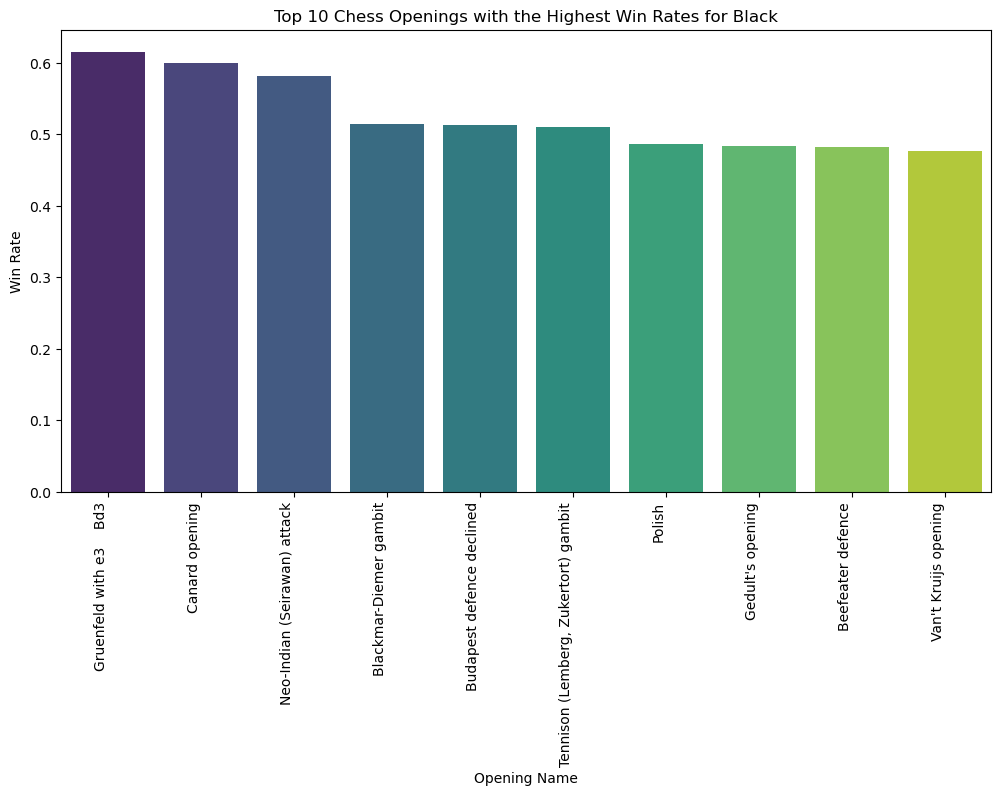

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_opening_stats.head(10), x='Opening', y='WinRate', palette='viridis')
plt.title('Top 10 Chess Openings with the Highest Win Rates for Black')
plt.xlabel('Opening Name')
plt.ylabel('Win Rate')
plt.xticks(rotation=90, ha='right')


plt.show()

In [27]:
best_player = data.groupby(['White', 'Result']).size().reset_index(name='count')

In [28]:
player_stats = pd.DataFrame()

player_stats['PlayerName'] = best_player['White']
player_stats['Wins'] = best_player[best_player['Result'] == '1-0']['count']
#player_stats['Losses'] = best_player[best_player['Result'] == '0-1']['count']
#player_stats['Draws'] = best_player[best_player['Result'] == '1/2-1/2']['count']

player_stats.fillna(0, inplace=True)

player_stats = player_stats.groupby('PlayerName').sum().reset_index()
sorted_player_stats = player_stats.sort_values(by='Wins', ascending=False)
sorted_player_stats.head()

,PlayerName,Wins
52970,"Nakamura,Hi",1315.0
67319,"Sarana,A",1030.0
3200,"Andreikin,D",936.0
34399,"Jobava,Ba",900.0
22017,"Fedoseev,Vl3",898.0


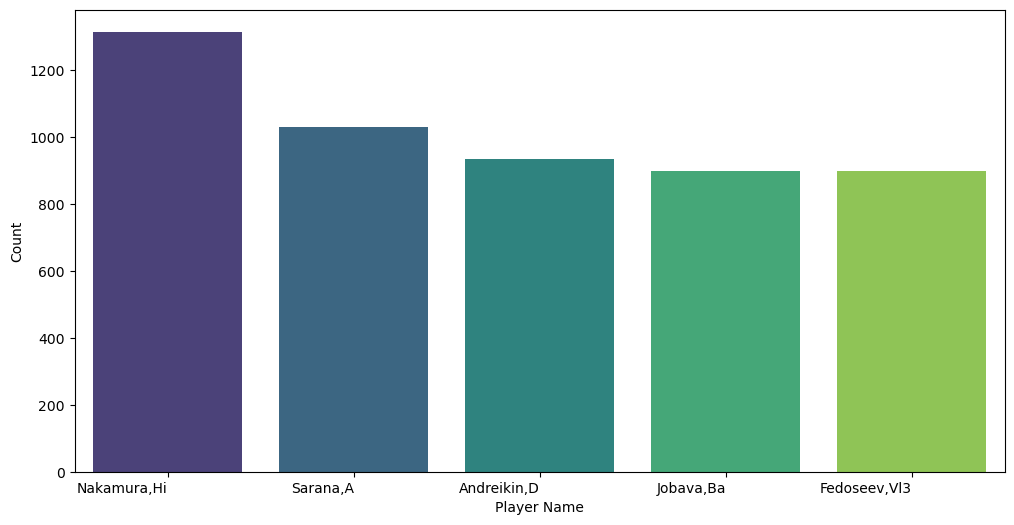

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_player_stats.head(5), x='PlayerName', y='Wins', palette='viridis')
plt.xlabel('Player Name')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')

plt.show()

In [30]:
best_player_b = data.groupby(['Black', 'Result']).size().reset_index(name='count')

player_stats_b = pd.DataFrame()

player_stats_b['PlayerName'] = best_player_b['Black']
player_stats_b['Wins'] = best_player_b[best_player_b['Result'] == '0-1']['count']
#player_stats['Losses'] = best_player[best_player['Result'] == '0-1']['count']
#player_stats['Draws'] = best_player[best_player['Result'] == '1/2-1/2']['count']

player_stats_b.fillna(0, inplace=True)

player_stats_b = player_stats_b.groupby('PlayerName').sum().reset_index()
sorted_player_stats_b = player_stats_b.sort_values(by='Wins', ascending=False)
sorted_player_stats_b.head()

,PlayerName,Wins
53193,"Nakamura,Hi",1019.0
67629,"Sarana,A",892.0
3201,"Andreikin,D",773.0
9696,"Bortnyk,Olexandr",735.0
22069,"Fedoseev,Vl3",726.0


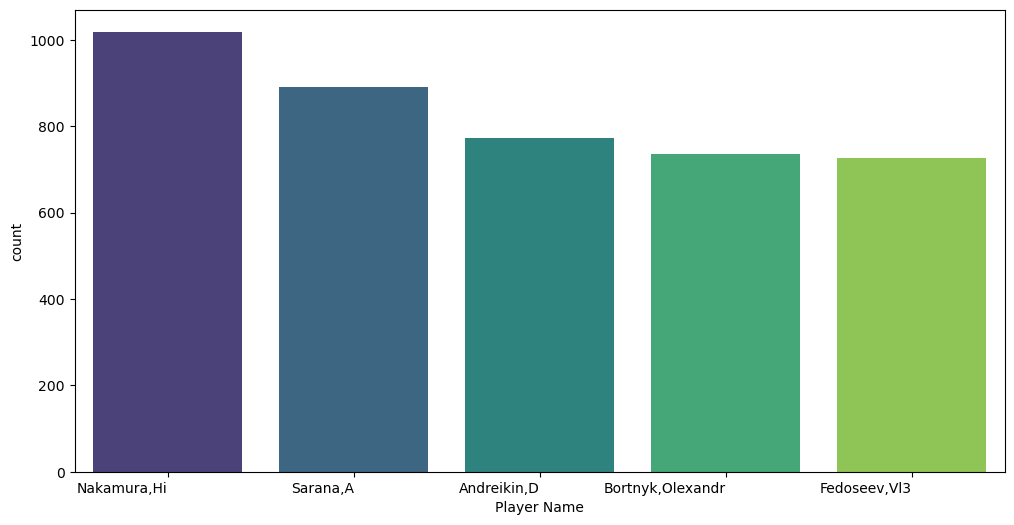

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_player_stats_b.head(5), x='PlayerName', y='Wins', palette='viridis')
plt.xlabel('Player Name')
plt.ylabel('count')
plt.xticks(rotation=0, ha='right')

plt.show()

In [35]:
top_players_count = 1
top_players = player_stats.nlargest(top_players_count, 'Wins')
filtered_df = data[data['White'].isin(top_players['PlayerName']) | data['Black'].isin(top_players['PlayerName'])]
player_opening_stats = filtered_df.groupby(['White', 'Opening']).size().reset_index(name='GameCount')
player_opening_stats = player_opening_stats.sort_values(by='GameCount', ascending=False)
player_opening_stats.head()

,White,Opening,GameCount
836,"Nakamura,Hi",Reti opening,474
848,"Nakamura,Hi",Sicilian,248
842,"Nakamura,Hi",Ruy Lopez,201
835,"Nakamura,Hi",Reti,172
821,"Nakamura,Hi",QGD,131
